In [1]:
using CairoMakie

include("../../src/nelder_mead.jl")
include("../../src/optitest.jl")

rastrigin (generic function with 1 method)

In [2]:
function neldermead_test(f, simplex, Niter)
    println(f.(simplex))
    nsimplex, points = neldermead(f, simplex, Niter)
    println(f.(nsimplex))
    points
end

neldermead_test (generic function with 1 method)

In [3]:
function plot2dpoints(func, points)
    x = getindex.(points, 1)
    y = getindex.(points, 2)
    f = Figure()
    ax = Axis(f[1, 1])
    ax.aspect = 1
    scatter!(ax, func.(points))
    f, ax
end

plot2dpoints (generic function with 1 method)

In [4]:
function interval((a,b))

    x -> x*(b-a) + a

end

function uniform((a, b))
    rand()*(b-a) + a
end

uniform (generic function with 1 method)

In [5]:
f = interval((-1, 1))
lim = [(-1., 1.)]
interval.(lim)(rand())



MethodError: MethodError: objects of type Vector{var"#15#16"{Float64, Float64}} are not callable
Use square brackets [] for indexing an Array.

In [6]:
function createsimplex(dim, lim)
    # lim[i] is the limit of x_i
    # interval = ((a, b), ) ->  (x -> x*(a-b) + a)
    lims = interval.(lim)
    [[f(rand()) for f in lims] for i in 1:dim+1]
end

createsimplex (generic function with 1 method)

In [7]:
createsimplex(2, [(-1, 1), (-1, 1)])

3-element Vector{Vector{Float64}}:
 [0.9829053169694619, 0.19628089085033573]
 [0.0234571227215854, 0.4867317707722587]
 [-0.7293797426063708, -0.4209501847152246]

[-109.5, -188.5, 85.5]
[-200.26506015003542, -199.25457415683195, -200.26547545434335]


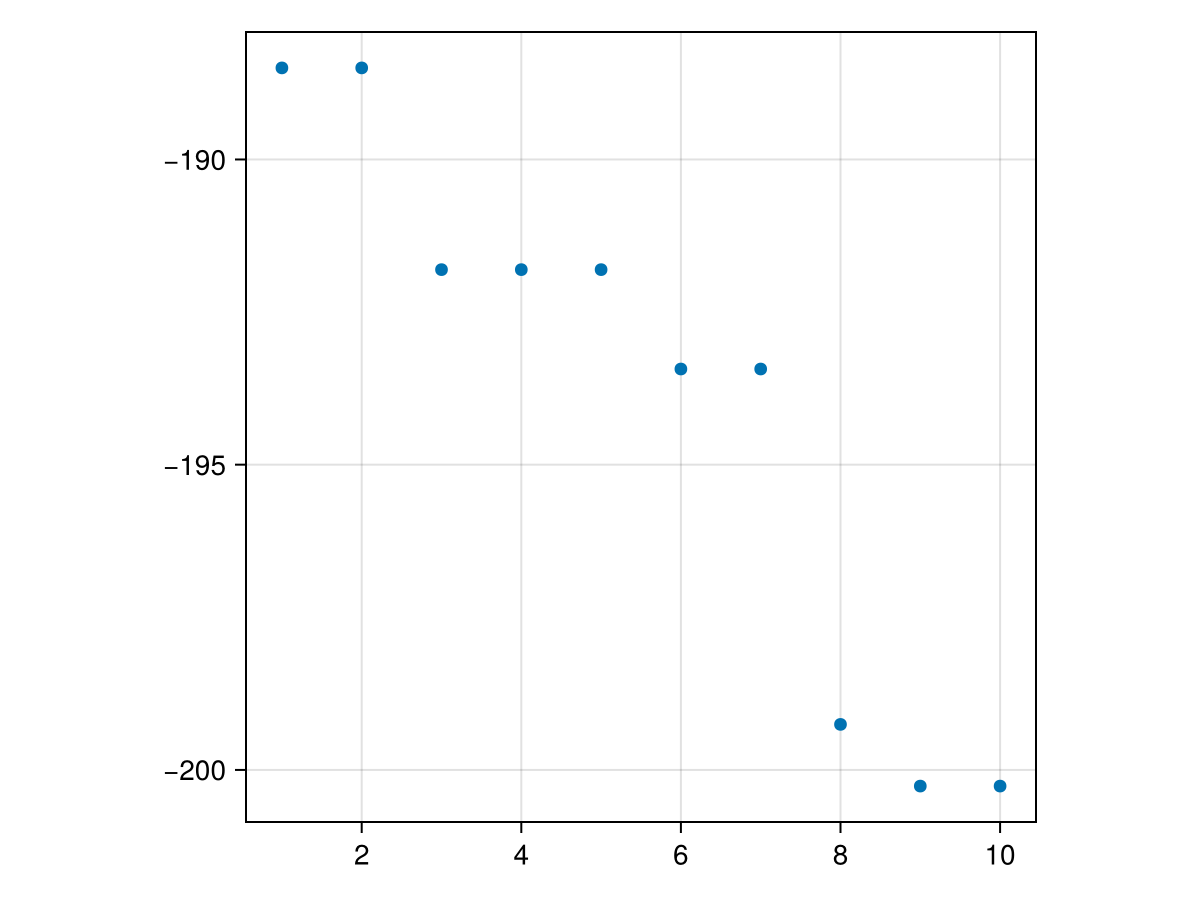

In [8]:
## test Space paper

simplex = [[1.0, 2.0], [2.0, 3.0], [4.0, 5.0]]
points = neldermead_test(spacepaper, simplex, 10)

f, ax = plot2dpoints(spacepaper, points)
f

[-0.8751460261987228, -0.32535606547675655, 2.6041018959164095]
[-37.6109265534234, -23.415071397424743, 20.040949187634165]


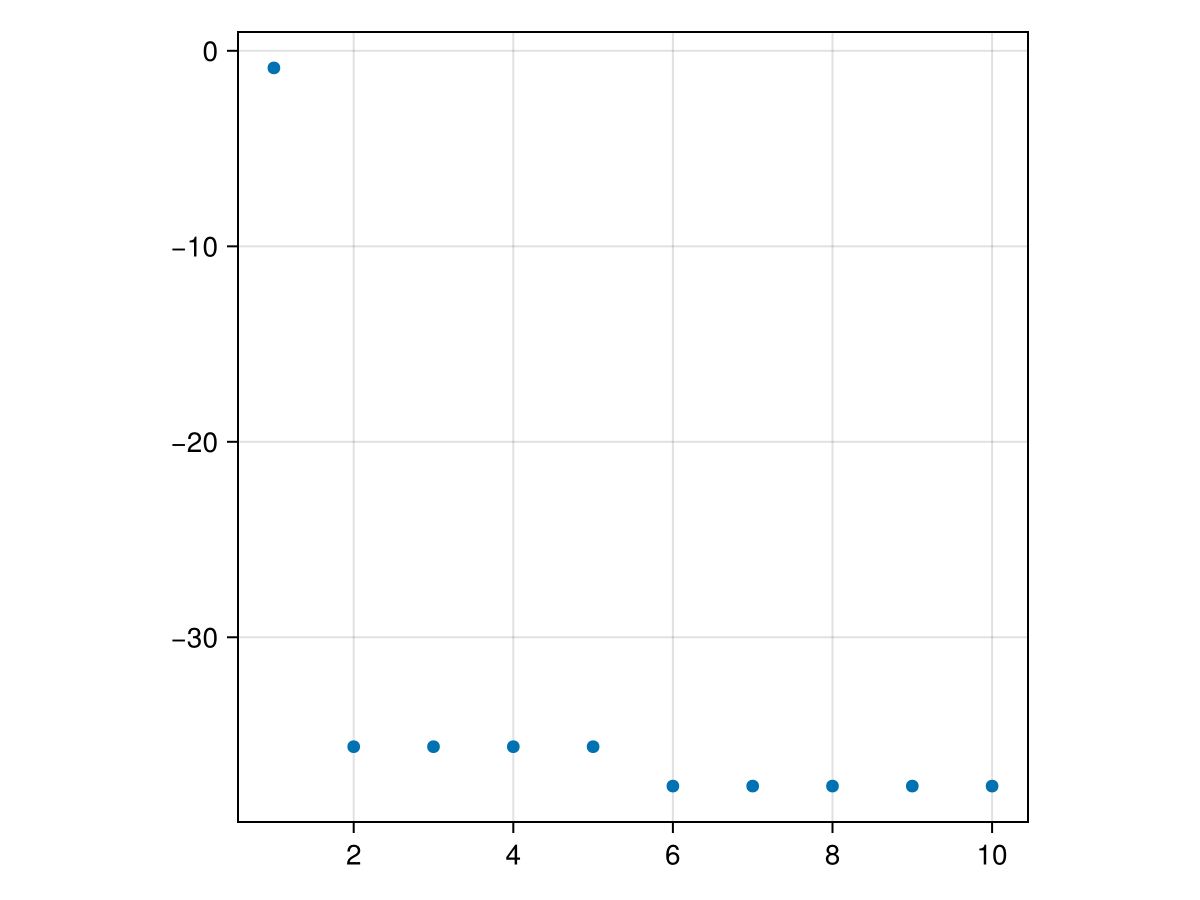

In [9]:
## test B2 
simplex = [[-25.0, 75.0], [-10.0, 20.0], [30.0, 90.0]]
points = neldermead_test(b2, simplex, 10)
f, ax = plot2dpoints(b2, points)
f


[36.296448455074774, 5.51969086795398, 0.37678664039966014, 28.283114244895696]
[0.3050915281968806, 0.3737194723973632, 0.37678664039966014, 0.2159831186363835]


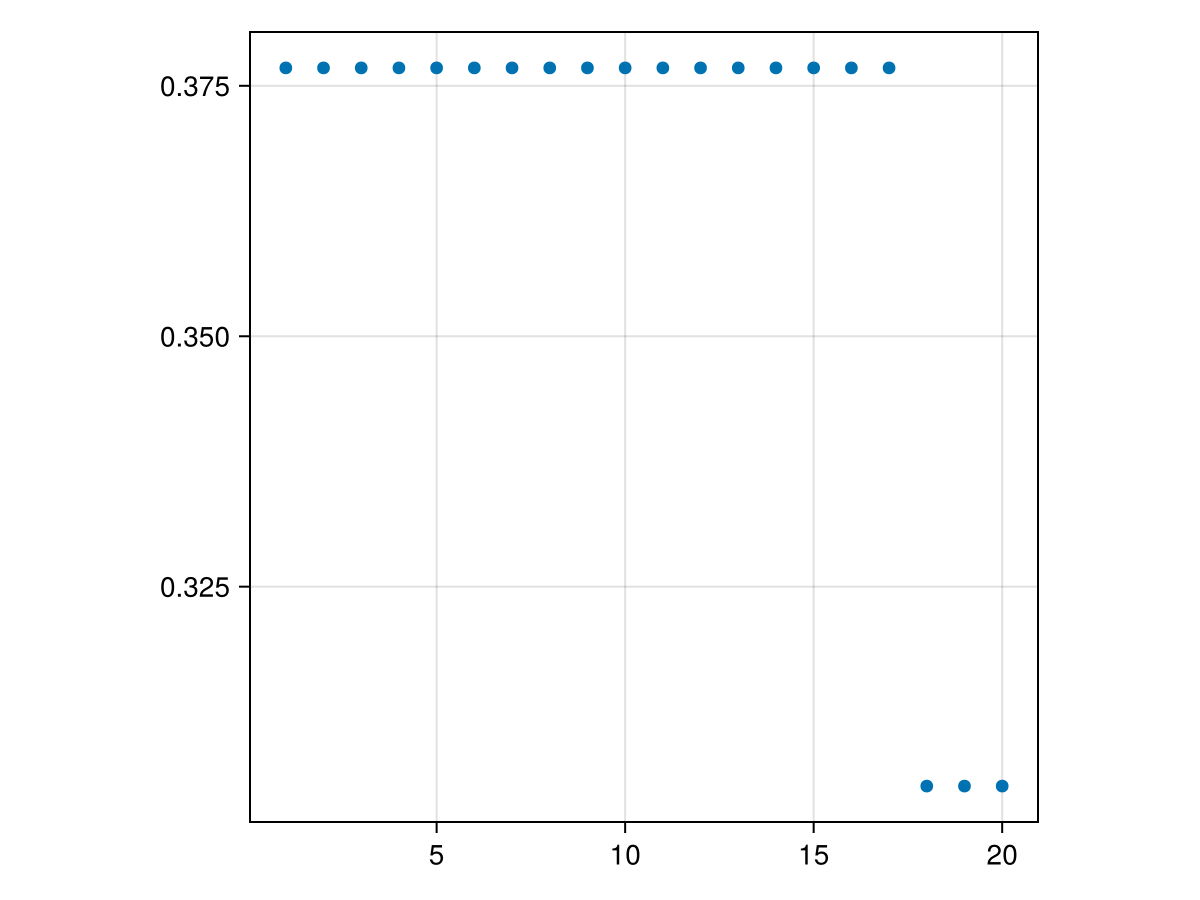

In [10]:
## test de Joung
inter = (-2.56, 5.12)
simplex = createsimplex(3, repeat([inter], 3))

points = neldermead_test(de_joung, simplex, 20)
f, ax = plot2dpoints(de_joung, points)
f


In [11]:
simplex, de_joung.(simplex)
ns, = neldermead(de_joung, simplex, 10)
ns

4-element Vector{Vector{Float64}}:
 [-0.1415926859163208, 0.37904530649205004, 0.46158726945292816]
 [-0.40540455680136755, -0.5393176135390465, -0.0851164188597453]
 [0.7681381724233678, 0.900470934674189, 0.6423091551776889]
 [0.826900205529685, 0.7058114102903392, -0.44032852440992193]

In [12]:
# el mejor simplejo fue 
[[-0.21370822564738312, -0.2876420533049715, -0.3536289258193406]
[-0.1886554802769654, -0.3593942588143646, -0.30941978717927454]
[-0.23861580288273765, -0.23889654623908674, -0.3213148944721148]
[-0.242347869264442, -0.29325088930140564, -0.3027539986038887]]

12-element Vector{Float64}:
 -0.21370822564738312
 -0.2876420533049715
 -0.3536289258193406
 -0.1886554802769654
 -0.3593942588143646
 -0.30941978717927454
 -0.23861580288273765
 -0.23889654623908674
 -0.3213148944721148
 -0.242347869264442
 -0.29325088930140564
 -0.3027539986038887

In [13]:
## test de rastrigin
inter = (-5.12, 5.12)
simplex = createsimplex(5, repeat([inter], 5))

points = neldermead_test(rastrigin, simplex, 100)
# f, ax = plot2dpoints(rastrign, points)


[73.5804715973987, 93.3414731054707, 70.55186598341929, 57.22636049044997, 93.90518466876253, 114.34311056457153]
[13.96140257916531, 17.162674889287246, 31.225131543930775, 31.43872032711191, 38.103930082656916, 25.31557158080007]


100-element Vector{Any}:
 [-0.09745213938517061, -1.1444403658957585, 4.138356347868242, -1.0210237657323287, 3.6666541923465905]
 [-0.09745213938517061, -1.1444403658957585, 4.138356347868242, -1.0210237657323287, 3.6666541923465905]
 [-0.09745213938517061, -1.1444403658957585, 4.138356347868242, -1.0210237657323287, 3.6666541923465905]
 [-0.09745213938517061, -1.1444403658957585, 4.138356347868242, -1.0210237657323287, 3.6666541923465905]
 [3.58957293482598, -1.8562889677440435, -0.9222242965811511, 0.11107725129505652, -0.9770331415391192]
 [3.58957293482598, -1.8562889677440435, -0.9222242965811511, 0.11107725129505652, -0.9770331415391192]
 [1.3041348316717392, -1.866866886024558, 0.15370298669059634, 0.11398129420183062, -0.8090185170742958]
 [1.3041348316717392, -1.866866886024558, 0.15370298669059634, 0.11398129420183062, -0.8090185170742958]
 [1.3041348316717392, -1.866866886024558, 0.15370298669059634, 0.11398129420183062, -0.8090185170742958]
 [1.3041348316717392, -1.8668668